In [5]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Heuristica

São comumente usados para resolver problemas grandes. São metodos  que fornece soluções factíveis, não necessariamente ótimas, em tempo relativamente pequeno.
Muitas das regras e decisões em PCP e Logísticas são heurísticas

**Heuristicas Construtivas:** controem um solução inicial para o problema, sem partir de um solução anterior

**Heuristicas de busca local:** melhoram uma soluçao já existente, por meio de movimentos(mudanças) sobre essa solução.

**Meta-heurístias:** Heurísticas que guiam heurísticas. Ex: Busca tabu, Colonias de formigas, Simulated Annealing..


### Problema de mochila

$$
max{\sum{P_iX_i}} \\
s.a \sum{W_i*X_i} <= W
$$

1. Ordenar os itens de ordem decrescente da utilidade relativa $\frac{u_i}{p_i}$ 
    * sendo que indica o item que está na posição
2. Na ordem definidia, escolhe os itens integralmente (fazendo $x_i$ = 1) até atingir a capacidade da mochila(sem violá-la)


In [6]:
# Ordenar os itens por utilidade relativa
def utilidade_relativa(utilidade, peso):
    # Calcular a utilidade relativa
    dict = {enum_ : round((u_i/p_i),2) for enum_,(u_i, p_i) in enumerate(zip(utilidade , peso))}
    
    # Ordenar o dicionário por utilidade relativa
    return sorted(dict.items(), key=lambda item: item[1], reverse=True)


# Maximar a utilidade, sem ultrapassar o peso máximo
def mochilaGulosaConstrutiva(U_, P_, W_=5):
    # Ordenar os itens por utilidade relativa
    itens = utilidade_relativa(U_, P_)
    print(pd.DataFrame(itens, columns=['Item', 'Utilidade Relativa']))
    
    # Inicializar variáveis
    custo_total = 0
    utilidade_total = 0
    iter_       = 0
    
    # Escolhendo os que tem melhor critério
    solucao = {}

    print("\n", "_"*50, "\n")
    # Iterar sobre os itens
    for item in itens:
        # Verificar se o peso do item não ultrapassa o peso máximo
        if custo_total + P_[item[0]] <= W_:
            # Atualizando o custo total
            custo_total = custo_total + P_[item[0]]

            # Atualizando a utilidade relativa total
            utilidade_total += U_[item[0]] 
            # Adicionando o item na solução
            solucao[item[0]] = P_[item[0]]

            print(" custo total = ", custo_total, " items adiciondo ", item[0])
        else : 
            print(f" item {item[0]} não foi adicionado, pois ultrapassa o peso máximo")

    # Retornar a solução e o custo total
    print(f"""
Solução.........: {solucao} 
Custo total.....: {custo_total} 
Utilidade total.: {utilidade_total}
    """)
    return solucao, custo_total

In [7]:
# peso_maximo = 5kg
peso_maximo = 5
utilidade = [
    6, 
    9, 
    7, 
    3, 
    5, 
    10, 
    2, 
    6
]
peso_gramas = [
    200,
    1000,
    400,
    400,
    200,
    3000,
    100,
    500
]
peso_kg = [p/1000 for p in peso_gramas]


In [8]:
mochilaGulosaConstrutiva(utilidade, peso_kg, peso_maximo)

   Item  Utilidade Relativa
0     0               30.00
1     4               25.00
2     6               20.00
3     2               17.50
4     7               12.00
5     1                9.00
6     3                7.50
7     5                3.33

 __________________________________________________ 

 custo total =  0.2  items adiciondo  0
 custo total =  0.4  items adiciondo  4
 custo total =  0.5  items adiciondo  6
 custo total =  0.9  items adiciondo  2
 custo total =  1.4  items adiciondo  7
 custo total =  2.4  items adiciondo  1
 custo total =  2.8  items adiciondo  3
 item 5 não foi adicionado, pois ultrapassa o peso máximo

Solução.........: {0: 0.2, 4: 0.2, 6: 0.1, 2: 0.4, 7: 0.5, 1: 1.0, 3: 0.4} 
Custo total.....: 2.8 
Utilidade total.: 38
    


({0: 0.2, 4: 0.2, 6: 0.1, 2: 0.4, 7: 0.5, 1: 1.0, 3: 0.4}, 2.8)

&nbsp;

Modificando o problema da mochila para uma busca local

In [308]:
# Ordenar os itens por utilidade relativa
def utilidade_relativa(utilidade, peso):
    # Calcular a utilidade relativa
    dict = {enum_ : round((u_i/p_i),2) for enum_,(u_i, p_i) in enumerate(zip(utilidade , peso))}
    
    # Ordenar o dicionário por utilidade relativa
    return sorted(dict.items(), key=lambda item: item[1], reverse=True)

In [99]:
def solucaoInicial(U_, P_, W_, itens):
    # Lista da solução inicial
    inicialList = {
        'item':[],
        'peso':[]
    }

    # Inicializar variáveis
    custo_total     = 0
    utilidade_total = []
    
    for item, _ in itens:
        
        # Verificar se o peso do item não ultrapassa o peso máximo
        if custo_total + P_[item] <= W_:
            # Atualizando o custo total
            custo_total = custo_total + P_[item]

            # Atualizando a utilidade relativa total
            utilidade_total.append(U_[item]) 
            
            # Adicionando o item na solução
            inicialList["item"].append(item)
            inicialList["peso"].append(P_[item])

    return {
        "solucao": inicialList,
        "utilidade_total_list": utilidade_total,
        "utilidade_total": sum(utilidade_total)
    }  

In [306]:
def mochilaBuscaLocal(utilidade, peso, W_=5, maxIter=100, removeItem =  "random"):
    # Ordenar os itens por utilidade relativa
    itens = utilidade_relativa(utilidade, peso)
    
    # Inicializar variáveis
    custo_total     = 0
    solucaoI_ = solucaoInicial(utilidade, peso, W_,itens)
    print("Solucao inicial : ",solucaoI_,"\n")
    

    # Iterar sobre os itens
    for _ in range(maxIter):
        # Pegar a solução inicial ou solução n
        S_ = solucaoI_["solucao"]

        # Pegar a utilidade total da solução inicial ou solução n
        U_ = solucaoI_["utilidade_total_list"]
        

        # remover um item aleatório
        match removeItem:
            case "random": i = np.random.choice(range(len(S_['peso'])))

            # remover o item com maior peso
            case "max" : i = S_['peso'].index(max(S_['peso']))
         
            # remover o item com menor peso
            case "min" : i = S_['peso'].index(min(S_['peso']))
    
            # remover o item com maior utilidade
            case "max utility": i = U_.index(max(U_))

            # remover o item com menor utilidade
            case "min utility": i = U_.index(min(U_))
            
        

        valores_restantes = [item for item in itens if item[0] not in S_['item']]

        del S_['item'][i]
        del S_['peso'][i]
        del U_[i]
        
        custo_total = sum(S_['peso'])        

        # Verificar se o peso do item não ultrapassa o peso máximo
        for item, _ in valores_restantes:
            
            # Verificar se o peso do item não ultrapassa o peso máximo 
            # e se o item não foi removido
            if custo_total + peso[item] <= W_:
                # Atualizando o custo total
                custo_total = custo_total + peso[item]

                U_.append(utilidade[item])
                # Adicionando o item na solução
                S_['item'].append(item)
                S_['peso'].append(peso[item])  
                
        if sum(U_) > solucaoI_["utilidade_total"]:
            solucaoI_["solucao"] = S_
            solucaoI_["utilidade_total"] = sum(U_)
            solucaoI_["utilidade_total_list"] = U_
            solucaoI_["custo_total"] = custo_total
 
    return solucaoI_

Removendo da mochila os items de maxima utilidade

In [100]:
S_ = mochilaBuscaLocal(utilidade, peso_kg, peso_maximo, maxIter=100, removeItem="max utility")

Solucao inicial :  {'solucao': {'item': [0, 4, 6, 2, 7, 1, 3], 'peso': [0.2, 0.2, 0.1, 0.4, 0.5, 1.0, 0.4]}, 'utilidade_total_list': [6, 5, 2, 7, 6, 9, 3], 'utilidade_total': 38} 



In [101]:
print(f"""
{S_["custo_total"]}
{S_["utilidade_total"]}
{S_["utilidade_total_list"]}
{S_["solucao"]}
""")


4.8
39
[6, 5, 2, 7, 6, 3, 9]
{'item': [0, 4, 6, 2, 7, 3, 1], 'peso': [0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 1.0]}



Removendo o aletoriamente

In [102]:
S_ = mochilaBuscaLocal(utilidade, peso_kg, peso_maximo, maxIter=100, removeItem="random")

Solucao inicial :  {'solucao': {'item': [0, 4, 6, 2, 7, 1, 3], 'peso': [0.2, 0.2, 0.1, 0.4, 0.5, 1.0, 0.4]}, 'utilidade_total_list': [6, 5, 2, 7, 6, 9, 3], 'utilidade_total': 38} 



In [103]:
print(f"""
{S_["custo_total"]}
{S_["utilidade_total"]}
{S_["utilidade_total_list"]}
{S_["solucao"]}
""")


4.8
39
[10, 5, 7, 3, 6, 2]
{'item': [5, 4, 2, 3, 7, 6], 'peso': [3.0, 0.2, 0.4, 0.4, 0.5, 0.1]}



### Observações

### Heuristicas

São algortimos que geram uma soluçao viável, mas não dão 

Podem ser:
* Construtivas, produzem uma solução viável, muitas vezes usando estratégia gulosa

* Busca Local, partem de uma solução inicial e vai melhoram  atraves de pequenas modificações.


&nbsp;

### MetaHeuristica

Metaheuristica é um procedimento sistemático, estocasticos e inexato para realizar a otimização de um processo. Para executar um metaheuristica precisamo de 4 condições:
1. Contruir um solução inicial
2. Avaliar a qualidade de uma solução
3. Ajustar uma solução para obter um nova
4. copiar uma solução

Primeira metaheuristicas que podemos explorar é a tentativa de reproduzir o método da subidade do gradiente. Nela vamos, a partir de uma solução inicial fazer um ajuste e comparar-se a solução obtiva é melhor que a solução atual.

#### Subida na colina

```pseudo
entrada : S inicial
saida   : S otimo

inicio:
    ENQUANTO <condição> FAÇA:
        r <- ajusta(S)
        SE Q(R) > Q(S) ENTÃO:
            S <- R
        END
    END
    RETURN S
    
```

In [104]:
def ajutar(inicial):
    return round(np.random.uniform(low=inicial - 1, high=inicial + 1, size=100)[0], 3)

def subidaColina(f, inicial, maxIter=10):
    iter_ = 0
    while iter_ != maxIter:
        
        R = ajutar(inicial) 
        if f(R) > f(inicial): 
            inicial = R
        iter_ += 1

    return inicial

In [105]:
f = lambda x:  x**2 - 4*x + 4
x  = subidaColina(f, np.random.RandomState(1).random(1), 100)
x

np.float64(-24.682)

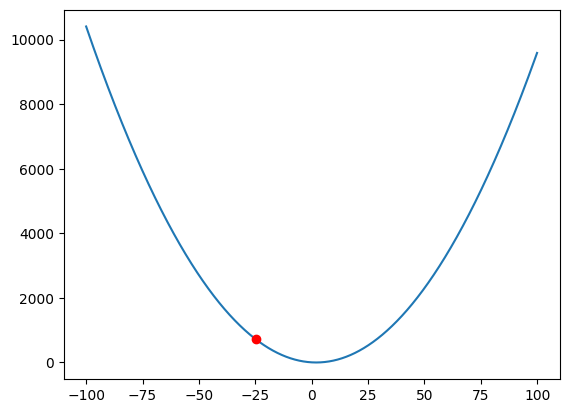

In [106]:
plt.plot(np.arange(-100,100,0.1),f(np.arange(-100,100,0.1)))
plt.plot(x,f(x), color='red', marker='o')   
plt.show()

#### Subida da colina global

Podemos modificar o algoritmo da subida da colina para procurar não apenas a primeira mas a melhor solução ajustada a partir de um solução referencia. Este conj. de soluções candidatas é chamada de vizinhança da solução de referencia e pode ser gerada de maneira deterministica ou estocatica. Apos gerado o conj. o algortiom seleciona a melhor solução candidata que possa ser a referencia.

```pseudo
entrada : S inicial
saida   : S otimo

inicio:
    ENQUANTO <condição> FAÇA:
        r <-<argumento>MAX{Q(R') : R'<- ajusta(S)}
        SE Q(R) > Q(S) ENTÃO:
            S <- R
        END
    END
    RETURN S
```

In [350]:
def ajutar(inicial):
    stocastic = np.random.normal(loc=inicial, scale=1, size=2)
    return stocastic[np.argmax(f(stocastic))]

def subidaColina(f, inicial, maxIter=100, memoria=False):
    print("solucao Inicial :", inicial, "f(inicial) : ", f(inicial))
    iter_ = 0
    pontos = [inicial]
    while iter_ != maxIter :
        
        R = ajutar(inicial)
        if np.isinf(f(R)): break

        if f(R) > f(inicial):    
            inicial = R
            if memoria: pontos.append(inicial)
        iter_ += 1

    return inicial, np.array(pontos)

In [353]:
f = lambda x:  -1 * (x **2 + 4 + np.cos(x**3))
x,p  = subidaColina(f, 10, 100, memoria=True)
x

solucao Inicial : 10 f(inicial) :  -104.5623790762907


np.float64(0.004614468093287659)

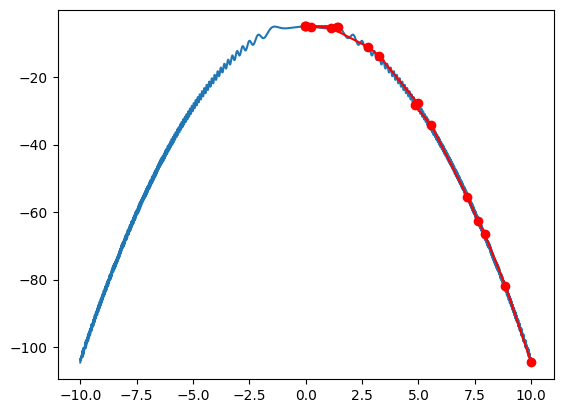

In [360]:
pi = np.arange(-10,10,0.01)
plt.plot(pi,f(pi))
plt.plot(p,f(p), color='red', marker='o')   
plt.show()


#### Caminhada aleatória
Outra modificação possivel da subida da colina é a tomar de referencia não apenas com melhor solução encontrada mas ultima solução encontrada. Nesse caso estamos fazendo para solução possivelmente piores, mas que contribuem  para desangua no processo. Como importante conseguencia este agoritmo não para em otimos locais é a nossa primeira metaheuristica de otimização global.

```pseudo
entrada : S inicial
saida   : S otimo

inicio:
    R <- S
    ENQUANTO <condição> FAÇA:
        R <- ajusta(S)
        SE Q(R) > Q(S) ENTÃO:
            S <- R
        END
    END
    RETURN S
```

In [388]:
def ajutarA(inicial):
    stocastic = np.random.normal(loc=inicial, scale=1, size=2)
    return np.random.choice(stocastic, 1)[0]

def caminhadaAleatoria(f, inicial, maxIter=100, memoria=False):
    print("solucao Inicial :", inicial, "f(inicial) : ", f(inicial))
    iter_ = 0
    pontos = [inicial]
    while iter_ != maxIter :
        
        R = ajutarA(inicial)
        if np.isinf(f(R)): break

        if f(R) > f(inicial):    
            inicial = R
            if memoria: pontos.append(inicial)
        iter_ += 1

    return inicial, np.array(pontos)

In [389]:
f = lambda x:  -1 * (x **2 + 4 + np.cos(x**3))
x,p  = caminhadaAleatoria(f, 10, 100, memoria=True)
x

solucao Inicial : 10 f(inicial) :  -104.5623790762907


np.float64(0.002369956158753364)

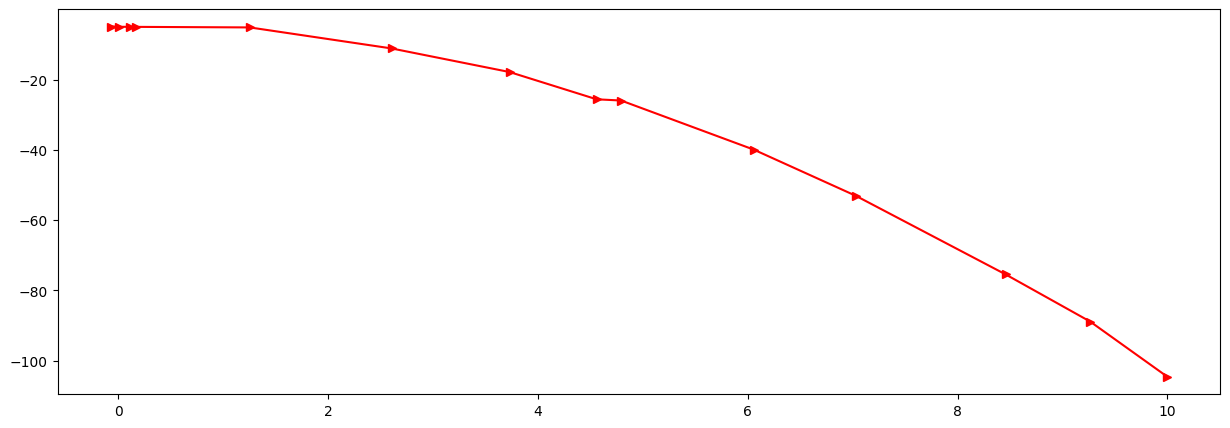

In [390]:
plt.figure(figsize=(15,5))
plt.plot(p,f(p), color='red', marker='>')   
plt.show()

#### Subida da colina com reinicioa aleatorio
Vamos combiniar a subida da colina com o reinicio aleatorio no qual realizamos uma subida na colina e depois de um tempo retornamos para outra solução inicial.


```pseudo
entrada : S inicial
saida   : S otimo

inicio:
    SOLUCAO_INICIAL <- S
    B <- S
    ENQUANTO <condição 1> FAÇA:
        ENQUANTO <condição 2> FAÇA:
            R <- Ajustar(S)
            SE Q(R) > Q(S) ENTÃO:
                S <- R
            END
        END
        SE Q(S) > Q(B) ENTÃO:
            B <- S
        END
        S <- SOLUCAO_INICIAL
    END
    RETURN B
```

In [295]:
def ajustarCR(solucao):
    stocastic = np.random.normal(loc=solucao, scale=0.5, size=2)
    return stocastic[np.argmax(f(stocastic))]


def subidaColinaReinicio(f, inicio, maxIter=100, memoria=False):
    pontos = []
    iter_ = 0
    B = solucao_inicial = inicio
    count_  = 0
    countB_ = 0

    while iter_ != maxIter:
        iterRandom_, iterW = int(random.randint(10, maxIter//3)), 0

        while iterW != iterRandom_:
            R = ajustarCR(inicio)

            if np.isinf(f(R)): break
            
            if f(R) > f(inicio):            
                inicio = R
                count_ += 1
            iterW += 1
            
        if f(inicio) > f(B):
            B = inicio
            countB_ += 1
            if memoria: pontos.append(B)
        
        inicio = solucao_inicial
        iter_ += 1
    print(f"""
          RESULTADOS
Solucao inicial......: {solucao_inicial}  
    > f(inicial).: {f(inicio)}

Melhor solução.......: {B}              
    > f(B).......: {f(B)}
B foi modificado.....: {countB_}
R foi modificado.....: {count_}
""")
    return B, np.array(pontos)

In [296]:
f = lambda x:  -1 * x **2 + 4 + np.cos(x**3)
x, p  = subidaColinaReinicio(f, -100, 1000, memoria=True)


          RESULTADOS
Solucao inicial......: -100  
    > f(inicial).: -9995.063247872467

Melhor solução.......: 7.033845438794012e-05              
    > f(B).......: 4.999999995052502
B foi modificado.....: 5
R foi modificado.....: 123897



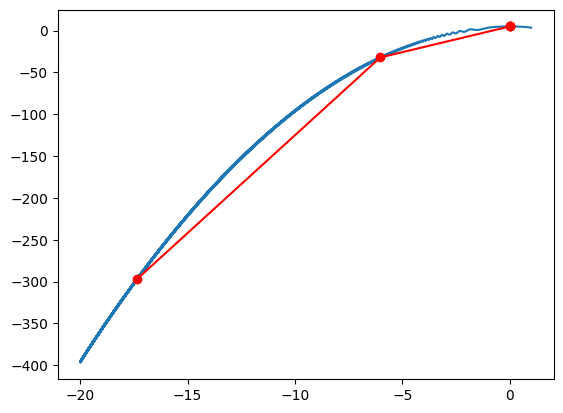

In [303]:
pi = np.arange(-20,1,0.0001)
plt.plot(pi,f(pi))
plt.plot(p,f(p), color='red', marker='o')

### Operador ajustar
Vamos que entre as caracteristicas exigidas para a aplicação das metaheuristicas está a capacidade de transformar uma solução em outra solução através da operação que chamamos ajustar.
Não existe a priori uma definição unica para essa operação ele costuma ser dependente da estrutura de representações das soluções.
Há, contudo, uma nação de que a modificação promovida é pequena e de natureza estocatica. Dessa forma a partida de uma solução S, e conj. de ajustes possíveis define uma vizinhança de S, ou seja todos as soluções alcançaveis a partir de S atraves de uma operação de Ajuste. Timpicamente este é um conj. pequeno se comparado ao conj. de todas as possíveis soluções do ploblema, o que torna o processo de otimização possivel.

Exemplo de AJUSTE
1. Representar atraves de um vetor
    * [ | | | x | | | | |] sortear uma posição e modificar o valor
    * [ | | x | | | | | | |] sortear uma posição e incrementar/decrementar o valor

2. Representação através de um permutação
    * Sortear duar posições e troca-las de um lugar
    * Sortear uma posição e trocar dois valores adjacentes


In [221]:
random.choices([1 , 2 , 3 , 4])

[3]

In [222]:
import random

def ajustar_valor(lista):
    # Sortear uma posição aleatória
    posicao = random.randint(0, len(lista) - 1)
    
    # Incrementar ou decrementar o valor na posição sorteada
    lista[posicao] += random.choice([-1, 1])
    
    return lista

# Exemplo de uso
lista = [1, 2, 3, 4, 5]
nova_lista = ajustar_valor(lista)
print(nova_lista)

[1, 1, 3, 4, 5]


### Recozimento Simulado

Em metaheurísticas, **recozimento simulado** refere-se a um algoritmo inspirado no processo de recozimento térmico, utilizado para resolver problemas combinatórios ou otimização global. Ele é amplamente utilizado em diversas aplicações, como:

### Definição:
O **recozimento simulado** é uma metaheurística que busca minimizar uma função objetiva por meio da exploração de vizinhanças em estados possíveis, ao longo de várias iterações, similar ao processo de resfriamento controlado em materiais metálicos.

### Funcionamento Geral:
1. **Inicialização**: Inicia-se com uma solução inicial aleatória.
2. **Avaliação**: A solução atual é avaliada com base em uma função objetivo.
3. **Movimento**: Em cada iteração, uma nova solução vizinha é gerada.
4. **Aceitação**: A nova solução é aceita com base em critérios probabilísticos que consideram a diferença na função objetivo entre a solução anterior e a nova. A aceitação é mais provável quando a diferença é pequena, mas também pode ocorrer com diferenças maiores, dependendo da temperatura simulada.
5. **Resfriamento**: A temperatura simulada diminui gradualmente ao longo das iterações, o que reduz a possibilidade de aceitar mudanças drásticas na solução.

### Propósito do Recozimento Simulado em Metaheurísticas:
- Explorar o espaço de solução globalmente enquanto permite explorar soluções locais.
- Evitar a convergência rápida para soluções subótimas.
- Melhorar a eficiência da busca por soluções ótimas em problemas complexos de otimização.

### Aplicações:
- **Otimização de roteamento** (VRP - Vehicle Routing Problem).
- **Ajuste de parâmetros** em modelos de machine learning.
- **Design de circuitos** e outros problemas combinatórios.

O recozimento simulado é uma ferramenta poderosa para lidar com problemas onde há um grande número de combinações possíveis e soluções locais muitas vezes podem ser subótimas.

```pseudo
B <- S
T <- temperatura inicial
ENQUANTO <CONDICAO> E T > 0 FAÇA:
    R <- Ajustar(S)
    P <- ALEATORIO(0,1)

    SE Q(S) > Q(R) OU P < exp({Q(R) -Q(S)}/{t})
        S <- R
    END
    SE Q(S) > Q(B) ENTÃO:
        B <- S
    END
    DECREMENTA T
END
RETURN B     
```

> O recozimento simulado apresenta a seguinte proposta:   
> Inicialmente vamos começar com alta prob. de aceitar a solução piores como referencia e essa prob. vai decrescendo lentamente ao longo das iterações ate que o algoritmo chega a um comportamento de subida da colina. De fato a  parte de um parametro de temperatura T, e prob. de aceitar a solução R no lugar de S é:

In [113]:
import random
import math

def ajustarRS(s):
    return s + random.uniform(-1, 1)

# Recozimento Simulado
def recozimento_simulado(f, inicio, temperatura, resfriamento, maxIter):
    # Inicializar solução inicial aleatória
    B = inicio
    valor_atual = f(inicio)
    iter_ = 0
    while iter_ != maxIter and temperatura > 0:
        # Gerar solução vizinha
        R = ajustarRS(inicio) 
        
        P = random.uniform(0, 1)
        # Aceitação da solução
        if f(inicio) > f(R) or P < np.exp((f(R) - f(inicio)) / temperatura):
            inicio  = R
        if f(inicio) > f(B):
            B = inicio
        
        # Resfriamento
        temperatura -= resfriamento

    return B, valor_atual

In [114]:
inicio = random.uniform(-10, 10)  # Solução inicial aleatória
temperatura = 1000                # Temperatura inicial
resfriamento = 0.095              # Taxa de resfriamento
it_max = 1000                     # Número máximo de iterações

# Função objetivo: maximizar x^2 - 10 * cos(2 * π * x)
f = lambda x: -1*(x**2 - 10 * math.cos(2 * x))

melhor_solucao, melhor_valor = recozimento_simulado(f,inicio, temperatura, resfriamento, 1000)
print(f'Solução ótima.: x = {melhor_solucao}\n valor ótimo..: {melhor_valor}')


Solução ótima.: x = 0.027503177150976166
 valor ótimo..: -74.63873053693673


In [121]:
p = np.arange(-10, 10, 0.1)
resultados = np.vectorize(f)(p)

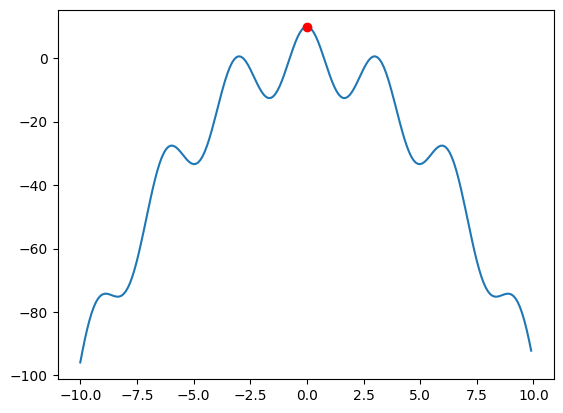

In [122]:
plt.plot(p, resultados)
plt.plot(melhor_solucao, f(melhor_solucao), color='red', marker='o')

In [117]:
melhor_solucao, f(melhor_solucao)

(0.027503177150976166, 9.98411889431666)

### Busca Tabu
A busca tabu é um método que define uma lista de soluções proibidas para evitar a repetição e garantir a exploração de novas regioes do espaço de soluções. De fato, funciona como uma subida da colina de maxima inclinação mas cada vez que uma nova solução é atingida a anterior é adicionada na list de soluções tabu, para que as quais não é possivel retornar.


> Esta lista é relativa - quando ela está cheia o elemento mais antigo é removido.

```pseudo
inicio:
    B <- S
    T <- []
    ENQUANTO <condição> FAÇA:
        INCLUIR(T, S)
        S <- ARG MAX {Q(R): R pertence VIZINHANÇA(S)\T}

        SE Q(S) > Q(B) ENTÃO:
            B <- S
        END
    END
    RETURN B
END
```

In [212]:
def incluir(T, S, limit = 5):
    if len(T) != limit:
        T.append(S)
        return T
    del T[0]
    T.append(S)
    return T


def ajustaBT(f, s, T, size_=2):
    s_ =  np.around(np.random.uniform(-1, 1, size=size_), 4).tolist()

    s_ = np.array([ i for i in s_ if i not in T], dtype=np.float32)
    
    return s_[np.argmax(f(s_))]

def buscaTabu(f, S, limit=5, maxIter=100, memoria = False, tamConjunto=2):
    pontos_ = [S]   
    T = []
    B = S
    iter_ = 0
    while iter_ != maxIter:        
        # Incluir a solução na lista tabu
        T = incluir(T, S, limit)
        

        # Gerar solução vizinh
        S = ajustaBT(f, S, T,size_=tamConjunto)
        
        if f(S) > f(B):
            B = S
            print(S)
            if memoria: pontos_.append(B)
        iter_ += 1
    return B, np.array(pontos_)

In [219]:
f = lambda x: -1*(np.pi*x**2 -10 * np.sin(10 *  x*2))
x, p = buscaTabu(f, 5, 5, 10, memoria=True)
x

-0.8589
-0.2517
-0.2426
0.0861


np.float32(0.0861)

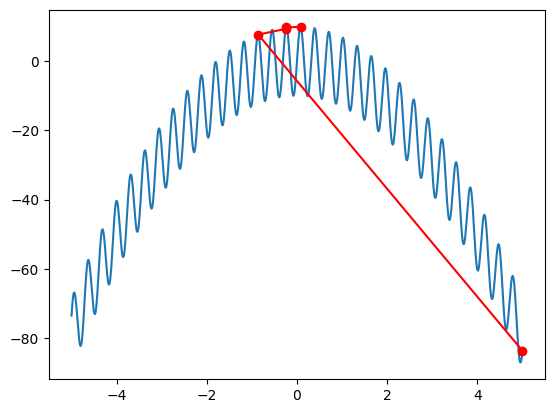

In [220]:
pi = np.arange(-5, 5,0.01)
fxs = np.vectorize(f)(pi)


plt.plot(pi, fxs)
plt.plot(p, np.vectorize(f)(p), color='red', marker='o')

Quando o conj. de soluções é muito grande a proibição de soluções individualmente é pouco eficaz, pois exige uma lista tabu muito grande para garantir uma diversificação satisfatória. O tamanho da lista pode ser um empecilho para eficiencia e calibragem do método. Neste sentido, uma alternativa é ter uma lista tabu com caracteristicas proibidas no qual ao inver de proibir soluções individualmente vamos proibir um caracteristicas que compõem essa solução.

```pseudo
INICIO:
    B <- S
    T <- vazio
    ENQUANTO <condição> FAÇA:
        Z <- ARG MAX { Q(R) : R pertence VIZINHAÇA(S)}
        T <- T U CARACTERISTICAS(Z - S)
        SE Q(Z) > Q(B) ENTÃO:
            B <- Z
        END
    END
    RETURN B
```

### Vizinhança